# 练习1：线性回归

# 单元线性回归

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO

## 查看数据

ex1data1.txt是一个关于城市人口与餐饮利润的数据集，有两个变量x，y。
- x(城市人口)
- y(利润)

In [2]:
data1 = np.genfromtxt('./data/ex1data1.txt',delimiter=',',dtype=float)
X_1=np.array(data1[:,0])
y_1=np.array(data1[:,1])

Text(0, 0.5, 'Profit in $10,000s')

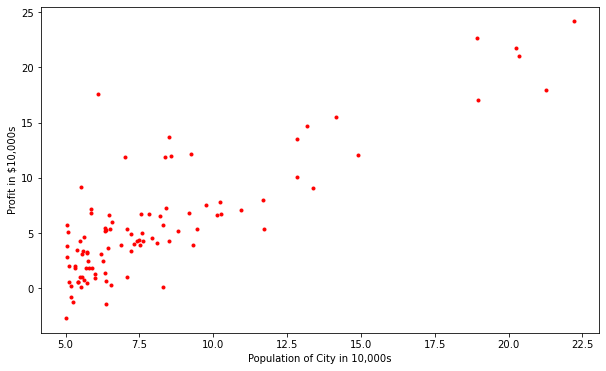

In [3]:
plt.figure(figsize=(10,6))
plt.plot(X_1,y_1,'r.')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

## 初始化变量

In [5]:
X_1_new = np.transpose(np.matrix(X_1))
# 对矩阵X 插入一列 1 
X_1_new = np.insert(X_1_new,0,1,axis=1) 
y_1_new = np.transpose(np.matrix(y_1))
X_1_new.shape, y_1_new.shape

((97, 2), (97, 1))

## 代价函数

假设函数（hypothesis function）：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 
代价函数（cost function）：
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$

In [6]:
# 代价函数
def computeCost(X, y, theta):
    cost = np.power((X * theta.T)-y,2)
    return np.sum(cost)/(2 * len(X))

### 初始化参数矩阵 $\theta$

In [7]:
theta_1 = np.matrix(np.zeros((1,2)))
theta_1

matrix([[0., 0.]])

In [8]:
# 刚开始的代价
print (computeCost(X_1_new, y_1_new, theta_1))

32.072733877455676


## 梯度下降
batch gradient decent

$$ \theta_j = \theta_j - \alpha\dfrac{\partial}{\partial\theta_j}J(\theta_j)  $$
$$\dfrac{\partial}{\partial\theta_j}J(\theta_j)=\frac{1}{m}\sum\limits_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})\cdot x^{(i)}$$

X 维度 m$\times$n，$\theta$维度 1$\times$n，y维度 m$\times$1

In [9]:
def gradientDecent(X, y, theta, alpha, iterations):
    temp= np.matrix(np.zeros(theta.shape))
    m = len(X)
    n = len(theta)
    cost = [] # 用于存放每次迭代后的代价
    for i in range(iterations):
        error = (X * theta.T)-y
        for j in range(n+1):
            # 更新theta值
            temp[0,j] = theta[0,j] - ((alpha/m) * np.sum(np.multiply(error, X[:,j])))
        theta = temp    
        cost.append(computeCost(X, y, theta))
        
    return theta,cost

初始化学习率和迭代次数

In [10]:
alpha = 0.01
iterations = 1000

In [11]:
theta_1_new,cost = gradientDecent(X_1_new, y_1_new, theta_1, alpha, iterations)
theta_1_new

matrix([[-3.24140214,  1.1272942 ]])

### 用拟合好的参数计算下此时的代价函数

In [12]:
computeCost(X_1_new, y_1_new, theta_1_new)

4.515955503078914

### 绘制拟合模型

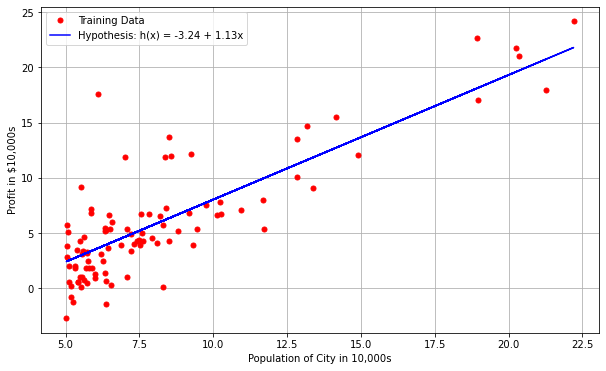

In [14]:
y_1_fit = theta_1_new[0,0] + (theta_1_new[0,1] * X_1)

plt.figure(figsize=(10,6))
plt.plot(X_1, y_1, 'r.', markersize=10,label='Training Data')
plt.plot(X_1, y_1_fit, 'b-', label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta_1_new[0,0],theta_1_new[0,1]))
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()

### 绘制代价函数收敛过程

Text(0, 0.5, 'Cost function')

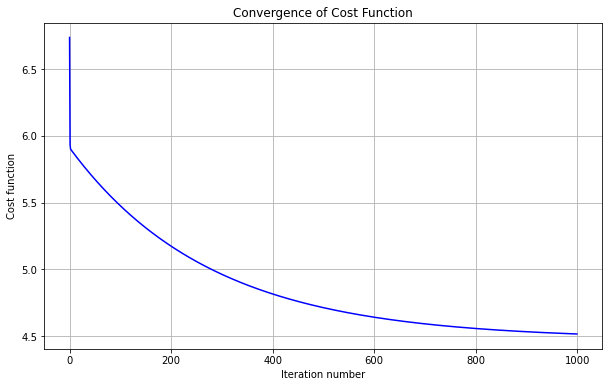

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(len(cost)),cost,'b')
plt.grid(True)
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Cost function")

# 多元线性回归

## 查看数据

ex1data2.txt 是一个房屋价格数据集，其中有2个变量
- x（房子的大小，卧室的数量）
- y（房子的价格）

In [16]:
data2 = np.genfromtxt('./data/ex1data2.txt',delimiter=',')
X_2=np.array(data2[:,[0,1]])
y_2=np.array(data2[:,2])

### 数据标准化

In [17]:
X_2 = (X_2 - np.mean(X_2,axis=0))/np.std(X_2, axis=0)
y_2 = (y_2 - np.mean(y_2,axis=0))/np.std(y_2,axis=0)

### 同样按上面相似的步骤计算梯度

In [19]:
X_2_new = np.matrix(X_2)
# 对矩阵X 插入一列 1 
X_2_new = np.insert(X_2_new,0,1,axis=1) 
y_2_new = np.transpose(np.matrix(y_2))
X_2_new.shape, y_2_new.shape

((47, 3), (47, 1))

In [20]:
theta_2 = np.matrix(np.zeros((1,3)))
theta_2_new,cost2 = gradientDecent(X_2_new, y_2_new, theta_2, alpha, iterations)
computeCost(X_2_new, y_2_new, theta_2_new)

0.13449810869344125

### 绘制代价函数收敛图像

Text(0, 0.5, 'Cost function')

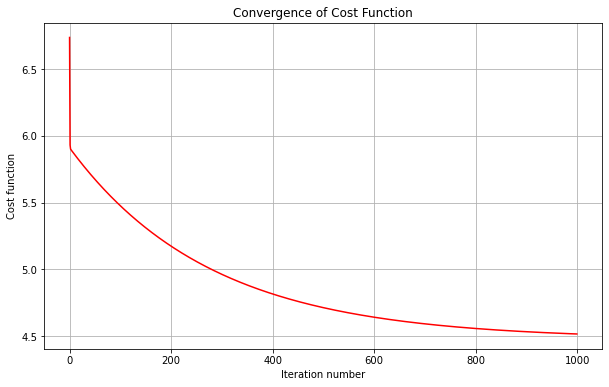

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(len(cost2)),cost,'r')
plt.grid(True)
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Cost function")

# 使用正规方程

使用正规方程解出的参数向量： $$\theta = (X^TX)^{-1}X^Ty$$

In [22]:
# 正规方程
def normalEqn(X, y):
    return np.linalg.inv(X.T@X)@X.T@y #X.T@X等价于X.T.dot(X)

应用到数据集1看看

In [23]:
normalEqn_theta1=normalEqn(X_1_new, y_1_new)#感觉和批量梯度下降的theta的值有点差距
normalEqn_theta1

matrix([[-3.89578088],
        [ 1.19303364]])

In [25]:
computeCost(X_1_new, y_1_new, normalEqn_theta1.T)

4.476971375975179

可见最终的代价相比之前的 4.515955503078914 还是有些差距

# 此外，还可直接用sklearn的工具包

In [26]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [27]:
model.fit(X_1_new, y_1_new)

LinearRegression()

In [31]:
# 使用模型来预测
y_fit = model.predict(X_1_new).flatten()

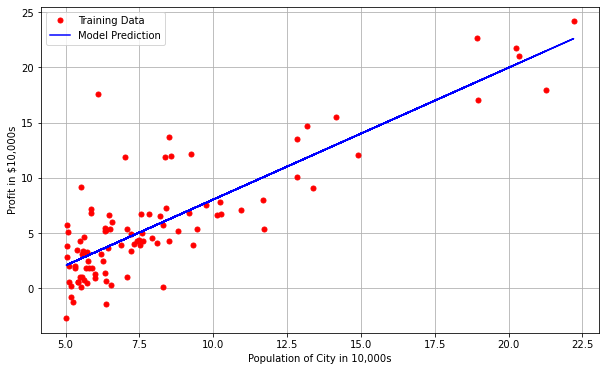

In [32]:
plt.figure(figsize=(10,6))
plt.plot(X_1, y_1, 'r.', markersize=10,label='Training Data')
plt.plot(X_1, y_fit, 'b-', label = 'Model Prediction')
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()

In [34]:
model.score(X_1_new, y_1_new)

0.7020315537841397